In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

from scipy.interpolate import interp1d

import nanonets_utils
import nanonets

In [2]:
def plot_freq(f, ax, min_y, max_y, N_f=5):

    ax.vlines(f, min_y, max_y, colors='black', linestyles='solid', label=f"$f_0 = {f}$ GHz")

    for n in range(2,N_f+1):
        ax.vlines(n*f, min_y, max_y, colors='#A60628', linestyles='dotted')
    
    return ax

In [3]:
dic = {f : pd.read_csv(f"amplitude/data/Nx=7_Ny=7_Nz=1_Ne=2_{f}.csv") for f in np.round(np.arange(0.3,4.1,0.4),2)}

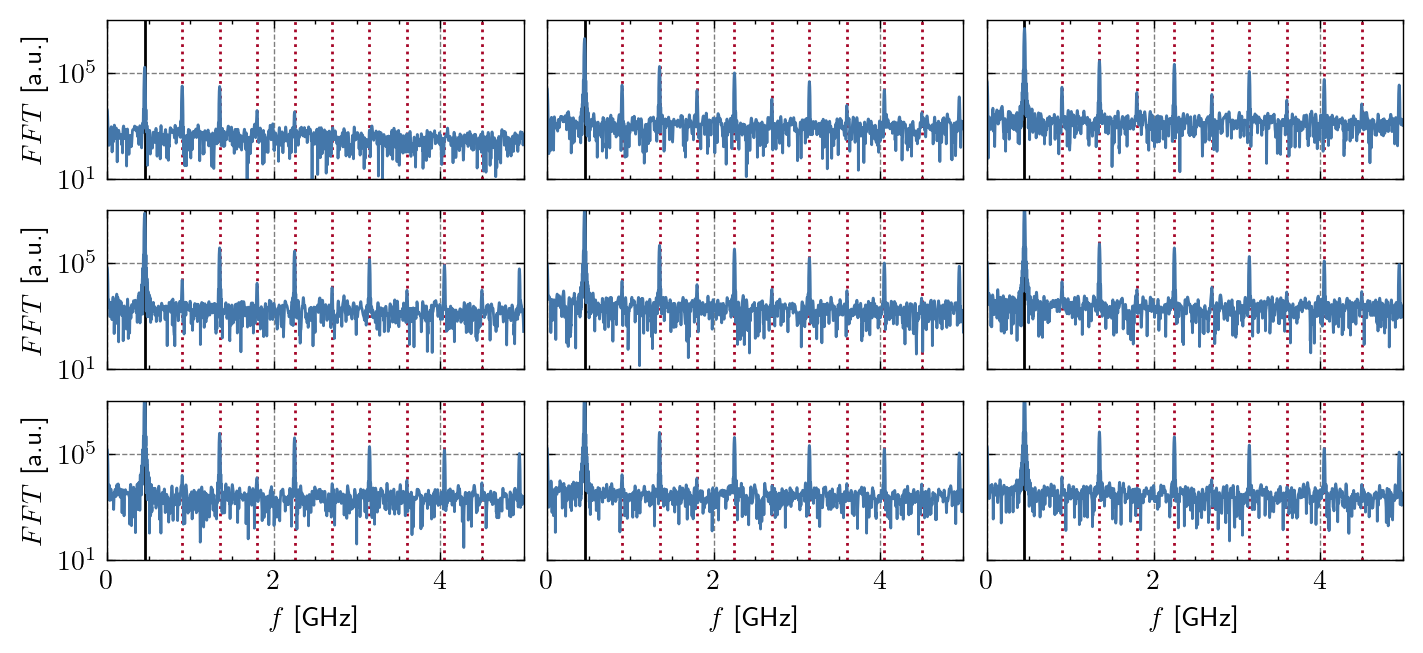

In [4]:
cmap    = plt.get_cmap('Reds')
miny    = 1e1
maxy    = 1e7
dt      = 1e-10
n_rows  = 3
n_cols  = 3
f       = 4.5

amplitude_vals = [0.3, 0.7, 1.1, 1.5, 1.9, 2.3, 2.7, 3.1, 3.5]

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight()*1.2)
    
    for i, a in enumerate(amplitude_vals):

        ax      = fig.add_subplot(n_rows,n_cols,i+1)
        signal  = dic[a]['Current'].values
        
        xf, yf  = nanonets_utils.fft(signal-np.mean(signal), dt, n_padded=65536)
        ax      = plot_freq(np.round(f/10,2), ax, miny, maxy, N_f=10)

        ax.plot(xf, yf)
        ax.set_xlim(0,5)
        ax.set_ylim(miny, maxy)
        ax.set_yscale('log')
        ax.legend(fontsize='x-small', loc='upper right')
        ax.get_legend().remove()

        if i % n_cols == 0:
            ax.set_ylabel('$FFT$ [a.u.]')
        else:
            ax.set_yticklabels("")

        if i >= (n_rows-1)*3:
            ax.set_xlabel('$f$ [GHz]')
        else:
            ax.set_xticklabels("")

    fig.savefig("plots/fft_comparsion_amplitude.png", transparent=True, bbox_inches='tight')
    fig.savefig("plots/fft_comparsion_amplitude.svg", transparent=True, bbox_inches='tight')

In [5]:
def relate_to_fundamental_freq(signal, f, dt, N_f=10):

    xf, yf  = nanonets_utils.fft(signal, dt, n_padded=65536)
    func    = interp1d(xf, yf)

    vals    = []
    for n in range(1,N_f+1):
        vals.append(func(n*f/10))
    
    return np.array(vals)

In [6]:
N_f                 = 20
df_fft_amplitudes   = pd.DataFrame()
f                   = 4.5

for a in dic.keys():
    
    signal  = dic[a]['Current'].values
    vals    = relate_to_fundamental_freq(signal, f, dt, N_f=N_f)

    df_fft_amplitudes[a] = vals

df_nonlinear    = df_fft_amplitudes / df_fft_amplitudes.iloc[0,:]
df_nonlinear    = df_nonlinear.drop(0).reset_index(drop=True)
df_nonlinear

,0.3,0.7,1.1,1.5,1.9,2.3,2.7,3.1,3.5,3.9
0,0.196106,0.017487,0.006100,0.002981,0.001928,0.001414,0.000877,0.000780,0.000553,0.000528
1,0.188850,0.088728,0.059525,0.049679,0.043325,0.038119,0.034119,0.030861,0.027753,0.025609
2,0.023119,0.011014,0.003833,0.002256,0.001424,0.000710,0.000693,0.000537,0.000171,0.000339
3,0.020646,0.050483,0.044484,0.037336,0.031466,0.026594,0.022835,0.019829,0.018002,0.016005
4,0.003035,0.005224,0.003244,0.001553,0.000956,0.000859,0.000407,0.000284,0.000383,0.000285
5,0.004247,0.023809,0.023956,0.018063,0.014444,0.012606,0.010713,0.009827,0.008784,0.008274
6,0.002647,0.003027,0.001951,0.001236,0.000837,0.000578,0.000570,0.000356,0.000206,0.000232
7,0.001737,0.011344,0.011908,0.010785,0.009329,0.008571,0.007927,0.007128,0.006475,0.005904
8,0.001993,0.001604,0.001422,0.001261,0.000388,0.000597,0.000461,0.000341,0.000285,0.000215
9,0.001361,0.006313,0.007365,0.008000,0.007105,0.006283,0.005892,0.005187,0.004789,0.004413


In [7]:
df_nonlinear_new    = df_nonlinear.copy()
df_nonlinear_new    = df_nonlinear_new.set_index(np.arange(2,N_f+1))

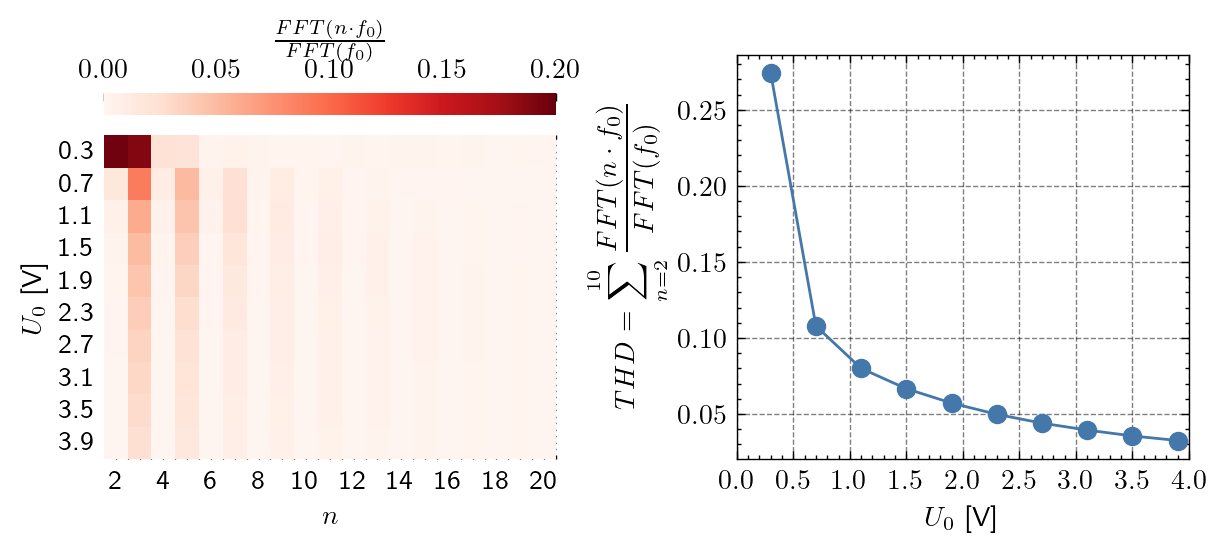

In [8]:
cmap = plt.get_cmap('Reds')

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot(1,2,1)
    fig.set_figwidth(fig.get_figwidth()*2)

    ax  = sns.heatmap(df_nonlinear_new.T, cmap='Reds', ax=ax, cbar_kws={'label':"$\\frac{FFT(n \cdot f_0)}{FFT(f_0)}$", "location":"top"}, vmin=0, vmax=0.2)
    ax.set_ylabel("$U_0$ [V]")
    ax.set_xlabel("$n$")

    ax  = fig.add_subplot(1,2,2)
    ax  = np.sqrt((df_nonlinear**2).sum()).plot(ax=ax, marker='o')
    ax.set_ylabel("$THD$ = $\displaystyle\sum_{n=2}^{10}\\frac{FFT(n \cdot f_0)}{FFT(f_0)}$")
    ax.set_xlabel("$U_0$ [V]")
    ax.set_xlim(0,4)

    plt.subplots_adjust(wspace=0.4)
    plt.locator_params(axis='x', nbins=8)

    fig.savefig("plots/harmonic_generation_amplitude.png", transparent=True, bbox_inches='tight')
    fig.savefig("plots/harmonic_generation_amplitude.svg", transparent=True, bbox_inches='tight')

---